In [1]:
import pandas as pd
import numpy as np

In [3]:
import warnings
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X = data.data  # features (indepdendent variable)
y = data.target  # response / outcome / target (depdendent variable)

In [8]:
# pd.DataFrame(X)

In [9]:
X[:1]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [10]:
X.shape

(506, 13)

In [11]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
df = pd.DataFrame(X, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.isnull().sum()  # checking for missing values in the data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
corr_values = df.corr().round(2)
corr_values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [14]:
corr_values[abs(corr_values) > 0.6]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.00,NaN,0.76,NaN,0.64,-0.71,NaN,0.72,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.76,NaN,1.00,NaN,0.73,-0.77,0.61,0.67,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,0.70
AGE,NaN,NaN,0.64,NaN,0.73,NaN,1.00,-0.75,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,0.66,-0.71,NaN,-0.77,NaN,-0.75,1.00,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.63,NaN,NaN,NaN,0.61,NaN,NaN,NaN,1.00,0.91,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.72,NaN,0.67,NaN,NaN,NaN,0.91,1.00,NaN,NaN,NaN,NaN


C:\Users\Prashant\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


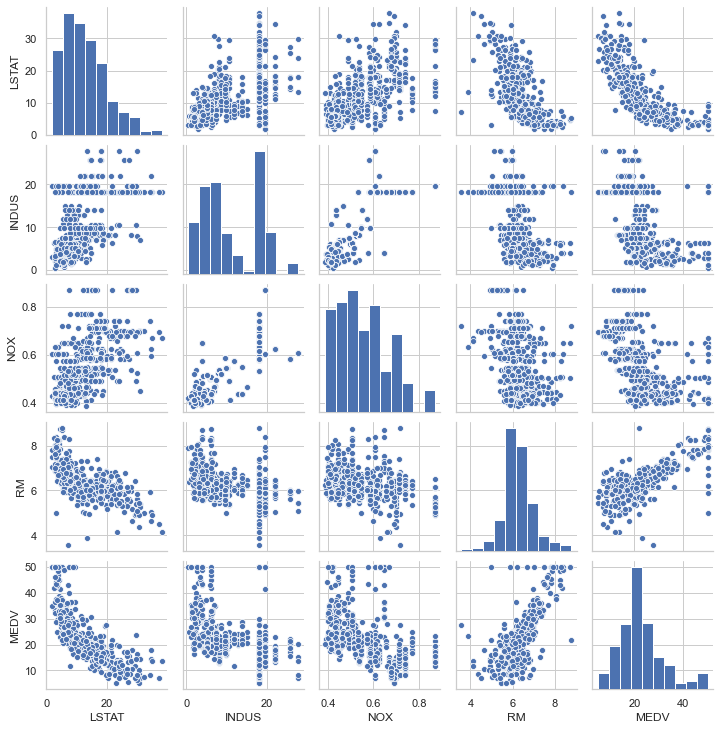

In [20]:
import seaborn as sns
sns.set(style='whitegrid')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2)

<AxesSubplot:>

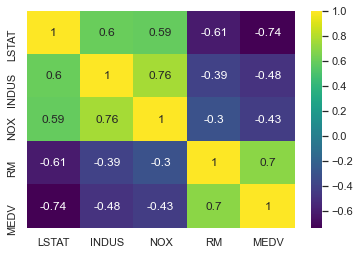

In [22]:
sns.heatmap(df[cols].corr().values, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap='viridis')

In [ ]:
# EDA CAN CONTINUE ON AND ON ................

### Modelling Steps

In [23]:
X.shape, y.shape

((506, 13), (506,))

In [25]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [26]:
# All the ML algorithms are referred as "estimators" in the sklearn package...
# and all thse estimators are actually Python "Classes" .... they will have attributes & methods
# Attributes stores some properties/values
# Methods >> functions which will used to "operate" on the data 
# Since all the estimators are Classes... they have to be instantiated, before they can be used.

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)   # training should be done on the training set.

LinearRegression()

In [28]:
LR.intercept_   # fetching the vlaue of intercept_ attribute  (w0 ot beta0)

31.631084035694585

In [20]:
LR.coef_    # coef_ is also an attrbibute... (w1, w2 .... wj)

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [29]:
coef_df = pd.DataFrame(LR.coef_, index=data.feature_names, columns=['LR_Coef'])
coef_df

,LR_Coef
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


In [31]:
# fetch the R^2 of the model >> Evaluating the model
LR.score(X_test, y_test)  # validating our model's performance on the TEST SET.

0.711226005748496

This means/conveys that our LR model has captured 71% of the variation (pattern) in the data... i.e. the model accounts for 71% variation in the data.

In [33]:
y_pred = LR.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)   

21.517444231176995

In [35]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred) )

4.638689926172797

In [38]:
## how to get the predictions from the model??? 
# This single datapoint has to be reshaped as a ROW VECTOR
newX = np.array([7e-03, 15, 5, 1, 0.2, 7, 50, 7.5, 1, 310, 16, 400, 5]).reshape(1,-1)
newX.shape

(1, 13)

In [39]:
LR.predict(newX)

array([34.8718368])

In [40]:
### Let's try out a few more models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures

In [41]:
### Create 6 baseline models!!
models = [] 
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=100)))
models.append(('EN', ElasticNet(random_state=100)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=100)))
models.append(('SVR', SVR()))

models # we have created a list of models which will be tried!!

[('LR', LinearRegression()),
 ('LASSO', Lasso(random_state=100)),
 ('EN', ElasticNet(random_state=100)),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor(random_state=100)),
 ('SVR', SVR())]

In [55]:
scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)  # training the estimator ...using the TRAIN sET
    names.append(name)
    sc = model.score(X_test, y_test)
    scores.append(sc) # R^2 for the estimator on the TEST SET
    
     
    print(name, '\t:', np.round(model.score(X_train, y_train), 3) )
    print(name, '\t:', np.round(sc, 3) )

LR 	: 0.743
LR 	: 0.711
LASSO 	: 0.69
LASSO 	: 0.656
EN 	: 0.689
EN 	: 0.659
KNN 	: 0.66
KNN 	: 0.585
CART 	: 1.0
CART 	: 0.736
SVR 	: 0.177
SVR 	: 0.282


## Model Selection & Evaluation

In [ ]:
### Till now, what we have got is the accuracy values of the 6 models
# How confident you would be that the DT model will give the 
# same 0.736 R^2 on ANY OTHER "SIMILAR" test set ??

# Accuracy (in this case R^2) means: how close are the predicted values to the actual vlaues 
# Precision means: how close are the predicted values amongst themselves

# How DO I GET THE PRECION OF THE MODELS ????
# Remmebr that: Using validation_set, we can only find the Accuracy of the models..
# For getting the precision, we need to "CROSS-VALIDATE" the models
# CV:: means repeated training & testing several times, on a similar dataset
        
# LEt's say: [0.73, 0.725, 0.71, 0.745, 0.752] CV accuracies..
# PRecision given by the std_dev of these CV_accuracies..
# If more std_dev... model is less precise... and vice versa.

# CV Types:
#     - KFold (shuffle the data once, and split into 5 parts..)
#     - StratifiedKFold
#     - ShuffleSplit(10)
#     - LeaveOneOut  (when K = N)
#     - LeavepOut


In [45]:
#%% evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scoring = 'r2' #'neg_mean_squared_error'
results = []
names = []
n_splits = 5

for name, model in models:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=105)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

LR: 0.721713 (0.030218)
LASSO: 0.665697 (0.052176)
EN: 0.671387 (0.047494)
KNN: 0.522228 (0.025326)
CART: 0.743578 (0.118542)
SVR: 0.200482 (0.053077)


In [31]:
results

[array([0.73344921, 0.59978249, 0.74688906, 0.70723905, 0.75814293]),
 array([0.62505588, 0.61457129, 0.67748708, 0.66319042, 0.70350958]),
 array([0.63687712, 0.62703742, 0.68114826, 0.67221977, 0.7103447 ]),
 array([0.55153692, 0.50715843, 0.47158969, 0.56399261, 0.61173049]),
 array([0.6134999 , 0.66750416, 0.78971016, 0.71638493, 0.84115571]),
 array([0.2511303 , 0.07712674, 0.29483476, 0.19722706, 0.23387392])]

In [33]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
CART,61.349990,66.750416,78.971016,71.638493,84.115571,72.565097,9.150096
LR,73.344921,59.978249,74.688906,70.723905,75.814293,70.910055,6.399197
EN,63.687712,62.703742,68.114826,67.221977,71.034470,66.552545,3.391057
LASSO,62.505588,61.457129,67.748708,66.319042,70.350958,65.676285,3.688334
KNN,55.153692,50.715843,47.158969,56.399261,61.173049,54.120163,5.386402
SVR,25.113030,7.712674,29.483476,19.722706,23.387392,21.083855,8.257351


###  Standardize the Data

In [39]:
#%% Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []  # i am creating a list of pipelines!!

# pipelines.append(('ScaledLR', make_pipleline(StandardScaler(), LinearRegression()  )   )   ) 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])   ))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear'))])))
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LinearRegression())])),
 ('ScaledLASSO',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LASSO', Lasso())])),
 ('ScaledEN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('EN', ElasticNet())])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('CART', DecisionTreeRegressor())])),
 ('ScaledSVR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('SVR', SVR(kernel='linear'))]))]

In [46]:
scoring = 'r2' #'neg_mean_squared_error'
results = []
names = []
n_splits = 5

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=105)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100    

ScaledLR: 0.721713 (0.030218)
ScaledLASSO: 0.656544 (0.027706)
ScaledEN: 0.639526 (0.031876)
ScaledKNN: 0.743172 (0.077649)
ScaledCART: 0.745528 (0.118960)
ScaledSVR: 0.702009 (0.029024)


,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledCART,73.200393,86.024157,86.051343,73.948689,53.539235,74.552763,13.300117
ScaledKNN,73.456195,86.611296,68.926728,64.145114,78.446714,74.317209,8.681410
ScaledLR,73.466717,77.335556,68.811863,69.841359,71.400991,72.171297,3.378441
ScaledSVR,71.960526,73.215894,64.897283,71.377656,69.553067,70.200885,3.244968
ScaledLASSO,68.469513,69.032160,61.547347,64.650787,64.572421,65.654446,3.097577
ScaledEN,64.738371,68.663802,59.071951,65.055263,62.233773,63.952632,3.563840


## HW: Tryout MinMaxScaler & Normalizer

In [43]:
from sklearn import set_config
set_config(display="text")
knn_model = pipelines[3][1]
knn_model

Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])

In [44]:
set_config(display="diagram")
knn_model  # click on the diagram below to see the details of each step

Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])

In [ ]:
STEPS FOR HP Tuning:
    1. Identify and narrow down the transformer/scaler/algo which we want to tune..
    2. Identify the Hyper param for that transformer/scaler/algo which we want to tune..
    3. Create a list/array of parameter values you want to search/try-out
    4. Create a dict of param_values you want to tune
    5. PAss the dict to GridSearchCV function, alongwith the model (step1) & CV object.

In [48]:
# hYPRER paRAM tuning the pipiline
from sklearn.model_selection import GridSearchCV

k_values = np.array([1,3,5,7,9,11,13,15,16,17,18,19,21])
param_grid = {"KNN__n_neighbors": k_values}

kfold = KFold(n_splits=5, shuffle=True, random_state=105)
scoring = 'r2'

grid = GridSearchCV(estimator = knn_model, param_grid=param_grid, \
                    scoring=scoring, cv=kfold)  
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,\
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.784336 using {'KNN__n_neighbors': 3}
0.736478 (0.067010) with: {'KNN__n_neighbors': 1}
0.784336 (0.057780) with: {'KNN__n_neighbors': 3}
0.743172 (0.077649) with: {'KNN__n_neighbors': 5}
0.735113 (0.080006) with: {'KNN__n_neighbors': 7}
0.743936 (0.066018) with: {'KNN__n_neighbors': 9}
0.740720 (0.061440) with: {'KNN__n_neighbors': 11}
0.735406 (0.055975) with: {'KNN__n_neighbors': 13}
0.731481 (0.056946) with: {'KNN__n_neighbors': 15}
0.726676 (0.055725) with: {'KNN__n_neighbors': 16}
0.721435 (0.054098) with: {'KNN__n_neighbors': 17}
0.719253 (0.049804) with: {'KNN__n_neighbors': 18}
0.716262 (0.049151) with: {'KNN__n_neighbors': 19}
0.706963 (0.049588) with: {'KNN__n_neighbors': 21}


In [49]:
grid_result.best_estimator_

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN', KNeighborsRegressor(n_neighbors=3))])

In [51]:
final_knn_model = grid_result.best_estimator_

In [52]:
final_knn_model.fit(X,y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN', KNeighborsRegressor(n_neighbors=3))])

In [54]:
final_knn_model.predict(newX)  # getting the prediction form the Final model

array([37.43333333])

In [55]:
import pickle

In [56]:
with open('knn_model.pkl', 'wb') as handle:
    pickle.dump(final_knn_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
del final_knn_model

In [58]:
final_knn_model

NameError: name 'final_knn_model' is not defined

In [59]:
final_knn_model = pickle.load(open('knn_model.pkl','rb'))

In [60]:
final_knn_model.predict(newX)

array([37.43333333])